# Python - データの前処理

2020/04/13

- 参考教材
    - SkillUp AI
        - <https://www.skillupai.com/python_jdla/>
            - 機械学習のためのPython入門講座

## 前処理を体験してみる
- 前処理のチュートリアル、体験として。
- 完全・完璧な前処理ではない。

### 用語整理
- 目的変数(y) : 予測したい変数
- 説明変数(特徴量、特徴変数) : 予測するために使用する変数

### 事前準備

In [173]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### タイタニックのデータセットを入手する
<https://www.kaggle.com/c/titanic/data>

- train  
<https://github.com/dsindy/kaggle-titanic/blob/master/data/train.csv>

- test  
<https://github.com/dsindy/kaggle-titanic/blob/master/data/test.csv>

- 目的変数 : Survived
    - 生存したかどうか。1:生存 0:死亡

In [137]:
# データセットのインポート
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# train,testを一つのリストに格納しておく
#   -> trainデータに適用した処理はtestにも行う必要があるため、
#        二つをリストにまとめておいて効率よく同じ処理を適用する
data = [ train,test ]

## 基礎分析

データの中身を確認

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 確認
    - 欠損値が存在する
    - object型が存在する

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 確認
    - 欠損値が存在する
    - object型が存在する

#### ランダムにデータを抽出する

In [11]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


欠損値の確認

In [12]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


- 欠損値の数をカウントする

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- [参考]　欠損値ではない数値をカウントする

In [16]:
train.notnull().sum() 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## 外れ値の確認
- 可視化して確認する

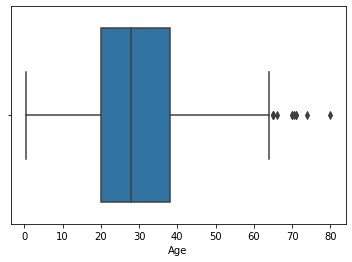

In [18]:
sns.boxplot(train["Age"])
plt.show()

- Age列に外れ値があることが分かる

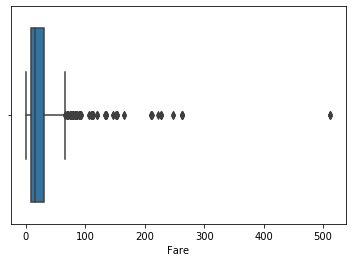

In [12]:
sns.boxplot(train["Fare"])
plt.show()

- Fare列に外れ値があることが分かる

### 考慮点
- この外れ値をどうみるか？
    - 今回のデータセットにおいて、年齢の外れ値はあり得る
        - あってもおかしくはない
    - 運賃も同様。利用客がどこから乗船したか？に意味があるのか。
    - 外れ値として除外、無視してしまうのはよくない、と考える

### Age列(年齢)を深堀り調査

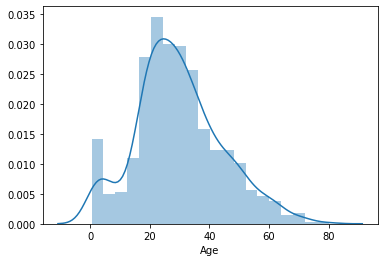

In [26]:
sns.distplot(train["Age"], bins = 20 )

## -> 欠損値を含むため、kde=False として曲線(正規分布曲線)を表示させなくてもよい
# sns.distplot(train["Age"], bins = 20, kde = True)

In [24]:
train["Age"].value_counts().tail(20)

64.00    2
40.50    2
32.50    2
45.50    2
20.50    1
24.50    1
0.67     1
14.50    1
0.92     1
74.00    1
34.50    1
80.00    1
12.00    1
36.50    1
53.00    1
55.50    1
70.50    1
66.00    1
23.50    1
0.42     1
Name: Age, dtype: int64

- 各年齢に一人しか該当しない、という分布が複数存在している
- このような場合、個々の年齢に対する意味合いが薄いため、  
  グルーピングすることを考える
    - 10代、20代 ...

### Fare列(運賃)を深堀り調査

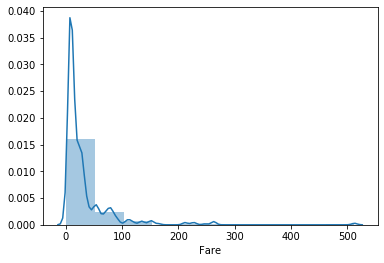

In [27]:
sns.distplot(train["Fare"], bins = 10)

- 一部にデータが集中している。ロングテール状態。

In [28]:
train["Fare"].value_counts().tail(15)

8.6542     1
8.7125     1
61.3792    1
6.9500     1
9.8417     1
8.3000     1
13.7917    1
9.4750     1
13.4167    1
26.3875    1
8.4583     1
9.8375     1
8.3625     1
14.1083    1
17.4000    1
Name: Fare, dtype: int64

- 各料金帯に一人しか該当しない、という分布が複数存在している
- Fareに対してもグループ化することを考える

### 各要素と生存との関係を確認する

- Pandasの機能で確認

In [29]:
# 相関関係(相関係数)を確認する
train.corr().style.background_gradient(cmap="autumn_r")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Seabornで確認する

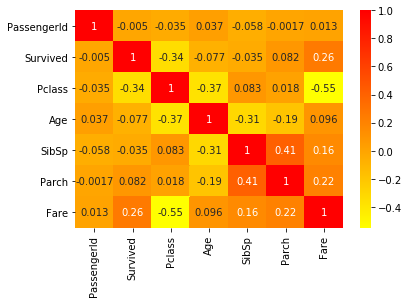

In [33]:
# 量的変数の相関
sns.heatmap(train.corr(), cmap = "autumn_r", annot = True)

- PassengerIdの相関係数が小さすぎる
    - 不要かどうかを調査する必要がある  
  
   
- 相関関係だけで判断するのは難しい
    - 相関係数が0の時に2変数間の関係性を言及しにくい
    - 相関関係を見て、大まかな「アタリ」を付ける用途で使うのが望ましい
        - この変数とこの変数が関係ありそうだ、といった予想
    - 説明変数を個々に調査するべき

- 仮説を立てつつ、変数間の関係を読み解いていくこと

### 性別と生存率の関係

In [34]:
# 性別毎の生存者数
train.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

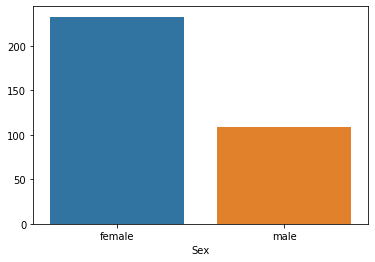

In [19]:
# 性別毎の生存者数をグラフ化
sum_survived = train.groupby(['Sex'])['Survived'].sum()
sns.barplot( sum_survived.keys(), sum_survived.values )
plt.show()

- 女性の生存者数が多い
    - 女性 = 生存率が高いと言える？
    - 乗船していた人数の内、男女の内訳は？

In [35]:
# 男性の生存者数、死亡者数、
# 女性の生存者数、死亡者数を確認する
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

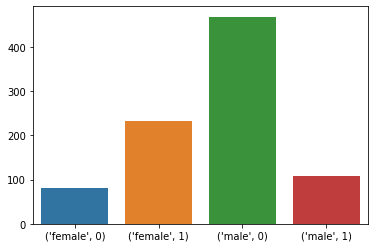

In [36]:
data_count = train.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()

- 0: 生存 1: 死亡
- このデータからは、女性の生存率が高い？ということが見て取れる

性別毎の生存率

In [51]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- 女性の生存率が高い
- 男女で生存率の差が大きい
    - 性別と生存率には何か関係がある、ということが読み取れる

### 乗船した港毎の生存率を見る

In [52]:
train.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

- C,Q,S : 港名
- この結果の読み方
    - [例] 港 C から乗船した人の内、生存した人数 75人、死亡した人数 93 人

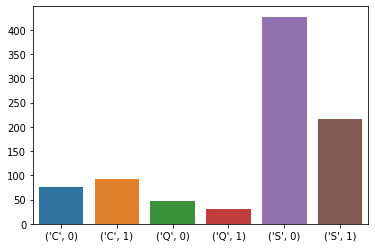

In [39]:
data_count = train.groupby(['Embarked', 'Survived'])['Survived'].count()
sns.barplot(data_count.keys(), data_count.values)

In [40]:
# 乗船した場所ごとの生存率
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

- この結果から、Cから乗船した場合は生存率が高い？と見える

## 仮説を立ててデータを確認し、前処理の方針を決める
- 「名前」は予測に必要か？
- 欠損値の扱いをどうするか？
    - 置き換える必要がある
    - 何に置き換えるか？
- 外れ値の扱いをどうするか？

## 基礎分析の結果まとめ
- 欠損値 : あり
- 外れ値 : なし
    - 年齢と運賃を箱ひげ図で表示した時、見た目としては外れ値は「あり」となるが、  
      外れ値に見える値の意味の解釈を踏まえると「なし」となる
- グルーピングが必要なデータが存在
    - 年齢 : 粒度が細かすぎる。何十歳代かでグルーピングする。
    - 運賃 : 粒度が細かすぎる。何円代かでグルーピングする。
- 相関関係
    - PassengerId : 非常に小さい
- 説明変数として不要と思われるデータ(列毎削除する候補）
    - PassengerId : 生存率との相関が小さい(関係性がなさそう）
    - Name : 個人の氏名によって生存率が変わるとは思えない
        - ただし、性別については考慮が必要そうである、ということが見えた
        - 名前には性別の特徴が出てくる（男性にしかつけない名前、など）
    - Ticket : 規則性が読み取れない
    - Cabin : 欠損値が多すぎる
        - 補完しきれない
        - 列毎除外してもよい候補となる

# 前処理の実施

- データの加工、意味のある特徴量を作成する
    - 特徴量エンジニアリング
- 欠損値の処理
- 数値データのカテゴライズ
- 不要データの削除
- 文字列データの数値化

### 名前
- 名前に性別の特徴が出る
- その特徴を名前の中から抜き出してみる

In [45]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [138]:
#名前から敬称を抜き出す
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [139]:
#"Title"という列を作り、その中に全員分の敬称を収録する
#  - .apply : データ一つ一つに関数を適用して値を返す
for df in [train]:
    df['Title'] = df['Name'].apply(get_title)

In [140]:
for df in [test]:
    df['Title'] = df['Name'].apply(get_title)

In [141]:
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [142]:
test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

- 敬称毎の数を数える

In [143]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Jonkheer      1
Mme           1
Ms            1
Lady          1
Capt          1
Countess      1
Sir           1
Name: Title, dtype: int64

In [144]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

- ここで気づくべき点
    - 敬称を取り出した結果の問題
        - サンプル数が少ないものがある
            - 統計的特徴が出にくい
        - train or testの片方側にしか存在しないデータが存在する
            - 正しく学習できない
        - 同じ意味になるものはグルーピングしてしまう

In [145]:
# 女性に関するものをMiss に置換する
# それ以外はOthersに置換する(サンプル数が少ないためその他扱いとする)

for df in data:
    df['Title'] =df['Title'].replace(['Mlle','Ms','Mme'],'Miss') 
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

- 変換後の値を確認する

In [146]:
train.Title.value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

In [147]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

### 欠損値処理

In [148]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [149]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

#### 欠損値処理 : Embarked
- 欠損値があるのは、trainにある2個だけ

In [150]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- この場合、数が大きいものに寄せるのがよい（多数派に寄せる）
- 欠損値に S を代入する

In [151]:
train.Embarked = train.Embarked.fillna( 'S')

In [152]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 欠損値処理 : Age

In [153]:
train.groupby("Title")["Age"].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Others    45.545455
Name: Age, dtype: float64

- 年齢は何で埋めるか？
    - 平均値？
        - あまりよろしくない
        - 年齢の幅が大きいため
        - 男女で年齢平均も異なるため
- 年齢を埋める際の参考情報
    - 名前 -> 先ほど作成した敬称 : Title
        - 性別だけでなく年齢を意味する情報も含んでいるため
- 結論
    - 敬称で集計し、継承毎に年齢の平均を出す
    - その値を継承毎に欠損値の穴埋めを行う

In [154]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.368090
Mrs       35.898148
Others    45.545455
Name: Age, dtype: float64

In [155]:
mean.keys()

Index(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], dtype='object', name='Title')

In [156]:
for df in data:
    # 平均を出す
    mean = df.groupby('Title')['Age'].mean()
    for title in mean.keys():
        # 条件を満たす列に値を入れる
        #  - AgeがNull かつ Title が 現在捜査中のTitleと一致した場合
        df.loc[
                     ( df.Age.isnull() )&( df.Title == title ) , 'Age'
                 ] = mean[title]

#### 欠損値処理: Fare

- testのFareが一箇所だけ。
- この場合他への影響も少ないということから、取り敢えず中央値を埋めることにする

In [157]:
#testのFareを埋める
test.Fare = test.Fare.fillna( test.Fare.median() )

#### Cabinの確認

In [158]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [159]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

### 数値データのカテゴライズ化

#### Age

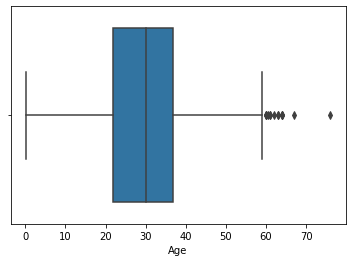

In [160]:
sns.boxplot(df['Age'])
plt.show()

- 今回は5分割してみる
    - 〜22
    - 23 〜 30
    - 31 〜 37
    - 38 〜 59
- ここに分類されるデータが全体の1/4ほど占めるため。
- 残りは 60 〜 100でグルーピング

 - pd.cut() を用いてカテゴライズする
     - 適用したい列
     - 分割する基準

In [186]:
df['Age']

0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
413    32.000000
414    39.000000
415    38.500000
416    32.000000
417     7.406471
Name: Age, Length: 418, dtype: float64

In [189]:
for df in data:
    df['Age_band'] = pd.cut( df['Age'], [0,22,30,37,59,100], right=False, labels=range(5))

In [190]:
train['Age_band'].head()

0    1
1    3
2    1
3    2
4    2
Name: Age_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

#### Fare

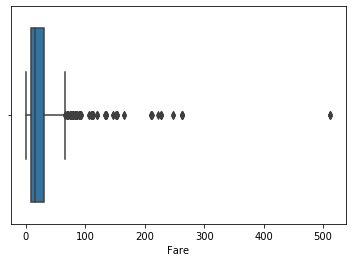

In [182]:
sns.boxplot( train['Fare'] )

In [183]:
for df in data:
    df['Fare_band'] = pd.cut(df['Fare'], [0, 8, 15, 31, 66, 520], labels=range(5), right=False)
    

In [185]:
train['Fare_band'].head()

0    0
1    4
2    0
3    3
4    1
Name: Fare_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

### カテゴライズ化した要素をグラフ化
- それぞれ Survived との関連を確認する

- Age

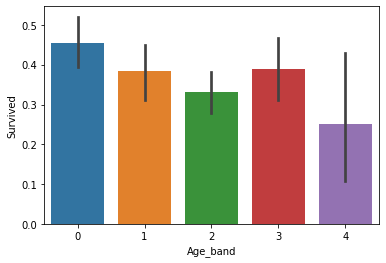

In [192]:
sns.barplot(train['Age_band'], train['Survived'])

- 0 のカテゴリ : 平均生存率 45%
- 4のカテゴリ　： 生存率が一番低いが、生存率にばらつきが多い

- Fare

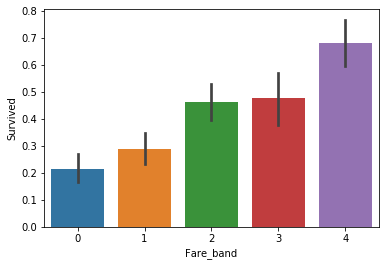

In [193]:
sns.barplot(train["Fare_band"], train["Survived"])

- Fareが大きくなるほど、生存率が上がる

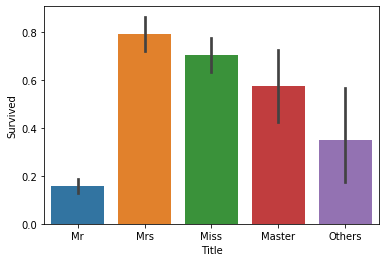

In [194]:
sns.barplot(train["Title"], train["Survived"])

- Mr がつく人物は生存率が低い
- Mrs がつく人物は生存率が高い

### 不要データの削除

- 削除データのおさらい  
  
[データの様子から不要なもの]
- PassengerId : 生存率と関係性がない
- Ticket : 生存率と関係性がない
- Cabin : 欠損値が多すぎて扱いに困る  
  
  
[特徴量エンジニアリングによって不要になったもの]
- Name : Title列を作成したため不要となった
- Age : Age_bandを作成したため不要となった
- Fare : Fare_bandを作成したため不要となった

In [195]:
# 削除したい列名リスト
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Age','Fare']

In [196]:
train = train.drop( drop_columns, axis = 1 )
test  = test.drop( drop_columns, axis = 1 )

In [197]:
data = [train,test]

In [198]:
data

[     Survived  Pclass     Sex  SibSp  Parch Embarked   Title Age_band  \
 0           0       3    male      1      0        S      Mr        1   
 1           1       1  female      1      0        C     Mrs        3   
 2           1       3  female      0      0        S    Miss        1   
 3           1       1  female      1      0        S     Mrs        2   
 4           0       3    male      0      0        S      Mr        2   
 ..        ...     ...     ...    ...    ...      ...     ...      ...   
 886         0       2    male      0      0        S  Others        1   
 887         1       1  female      0      0        S    Miss        0   
 888         0       3  female      1      2        S    Miss        0   
 889         1       1    male      0      0        C      Mr        1   
 890         0       3    male      0      0        Q      Mr        2   
 
     Fare_band  
 0           0  
 1           4  
 2           0  
 3           3  
 4           1  
 ..     

### object型のデータを数値に変換する
- 学習モデルは数値しか理解できないことから

In [199]:
for df in data:
    # 性別を数値化
    df.loc[df['Sex']=="female", "Sex"]=0
    df.loc[df['Sex']=='male','Sex']=1
    
    # 敬称を数値化
    df.loc[df['Title']=='Mr', 'Title']=0
    df.loc[df['Title']=='Miss', 'Title']=1
    df.loc[df['Title']=='Mrs', 'Title']=2
    df.loc[df['Title']=='Master', 'Title']=3
    df.loc[df['Title']=='Others', 'Title']=4
    
    # 乗船した港を数値化
    df.loc[df['Embarked']=='S', 'Embarked']=0
    df.loc[df['Embarked']=='C', 'Embarked']=1
    df.loc[df['Embarked']=='Q', 'Embarked']=2

In [202]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [203]:
train.corr()

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.035322,0.083081,1.000000,0.414838
Parch,0.081629,0.018443,0.414838,1.000000


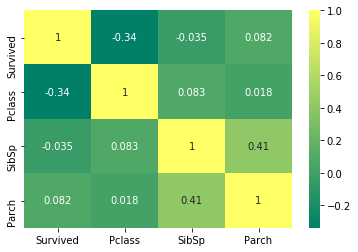

In [204]:
# 各変数の相関
sns.heatmap(train.corr(), cmap = "summer", annot = True)

## 前処理を施したデータの保存

In [205]:
# pickle形式でデータを保存
#   - pythonにおけるオブジェクトの読み書きが可能なデータ形式
# train
data[0].to_pickle("./titanic_train.pkl")

# test
data[1].to_pickle("./titanic_test.pkl")

## 保存したファイルを読み込む

In [206]:
#読み込むときは
train = pd.read_pickle("./titanic_train.pkl")
test = pd.read_pickle("./titanic_test.pkl")
data = [train,test]

In [207]:
data[0].head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [208]:
data[1].head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,3,1,0,0,2,0,2,0
1,3,0,1,0,0,2,3,0
2,2,1,0,0,2,0,4,1
3,3,1,0,0,0,0,1,1
4,3,0,1,1,0,2,1,1


## 前処理でやったことまとめ
- データを加工して意味のある特徴を作成する
- 欠損値の処理
- 数値データのカテゴライズ化
- 不要データの削除
- 文字データの数値化